In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [ ]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="bwr", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [ ]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [ ]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=2, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries with Focus on Extremes", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


# EDA

In [3]:
lca = pd.read_csv('../data/preprecessed_data/asian_lca.csv')
lca

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,United Arab Emirates,ARE,Climate Altering Land Cover Index,Index,100.329761,105.053281,106.232465,107.010473,109.587494
1,United Arab Emirates,ARE,Artificial surfaces (including urban and assoc...,1000 HA,204.420000,211.840000,217.120000,219.210000,227.880000
2,United Arab Emirates,ARE,Grassland,1000 HA,39.920000,40.900000,41.570000,41.840000,42.970000
3,United Arab Emirates,ARE,Herbaceous crops,1000 HA,124.170000,132.220000,130.800000,131.260000,131.030000
4,United Arab Emirates,ARE,Inland water bodies,1000 HA,18.210000,18.210000,18.130000,18.210000,18.210000
...,...,...,...,...,...,...,...,...,...
645,Vietnam,VNM,"Shrubs and/or herbaceous vegetation, aquatic o...",1000 HA,66.890000,66.950000,67.050000,66.960000,66.840000
646,Vietnam,VNM,Sparsely natural vegetated areas,1000 HA,6.120000,6.120000,6.100000,6.120000,6.110000
647,Vietnam,VNM,Terrestrial barren land,1000 HA,18.600000,18.590000,18.620000,18.590000,18.570000
648,Vietnam,VNM,Tree-covered areas,1000 HA,10792.010000,10876.360000,10911.070000,10948.320000,11038.720000


In [4]:
lca['Indicator'].value_counts()

Indicator
Climate Altering Land Cover Index                                    50
Artificial surfaces (including urban and associated areas)           50
Grassland                                                            50
Herbaceous crops                                                     50
Inland water bodies                                                  50
Mangroves                                                            50
Permanent snow and glaciers                                          50
Shrub-covered areas                                                  50
Shrubs and/or herbaceous vegetation, aquatic or regularly flooded    50
Sparsely natural vegetated areas                                     50
Terrestrial barren land                                              50
Tree-covered areas                                                   50
Woody crops                                                          50
Name: count, dtype: int64

Bộ dữ liệu Land Cover Accounts gồm 13 chỉ số, trong đó nhóm sử dụng # chỉ số sau cho việc phân tích thăm dò:
* **Climate Altering Land Cover Index:** Tổng diện tích đất
* **Artificial surfaces:** Tổng diện tích rừng
* **Grassland:** Tỉ lệ diện tích rừng trên tổng diện tích đất 
* **Herbaceous crops:**
* **Inland water bodies:**
* **Mangroves:**
* **Permanent snow and glaciers:**
* **Shrub-covered areas:**
* **Shrubs and/or herbaceous vegetation, aquatic or regularly flooded:**
* **Sparsely natural vegetated areas:**
* **Terrestrial barren land:**
* **Tree-covered areas:**
* **Woody crops :**

Các chỉ số còn lại trong bộ dữ liệu:


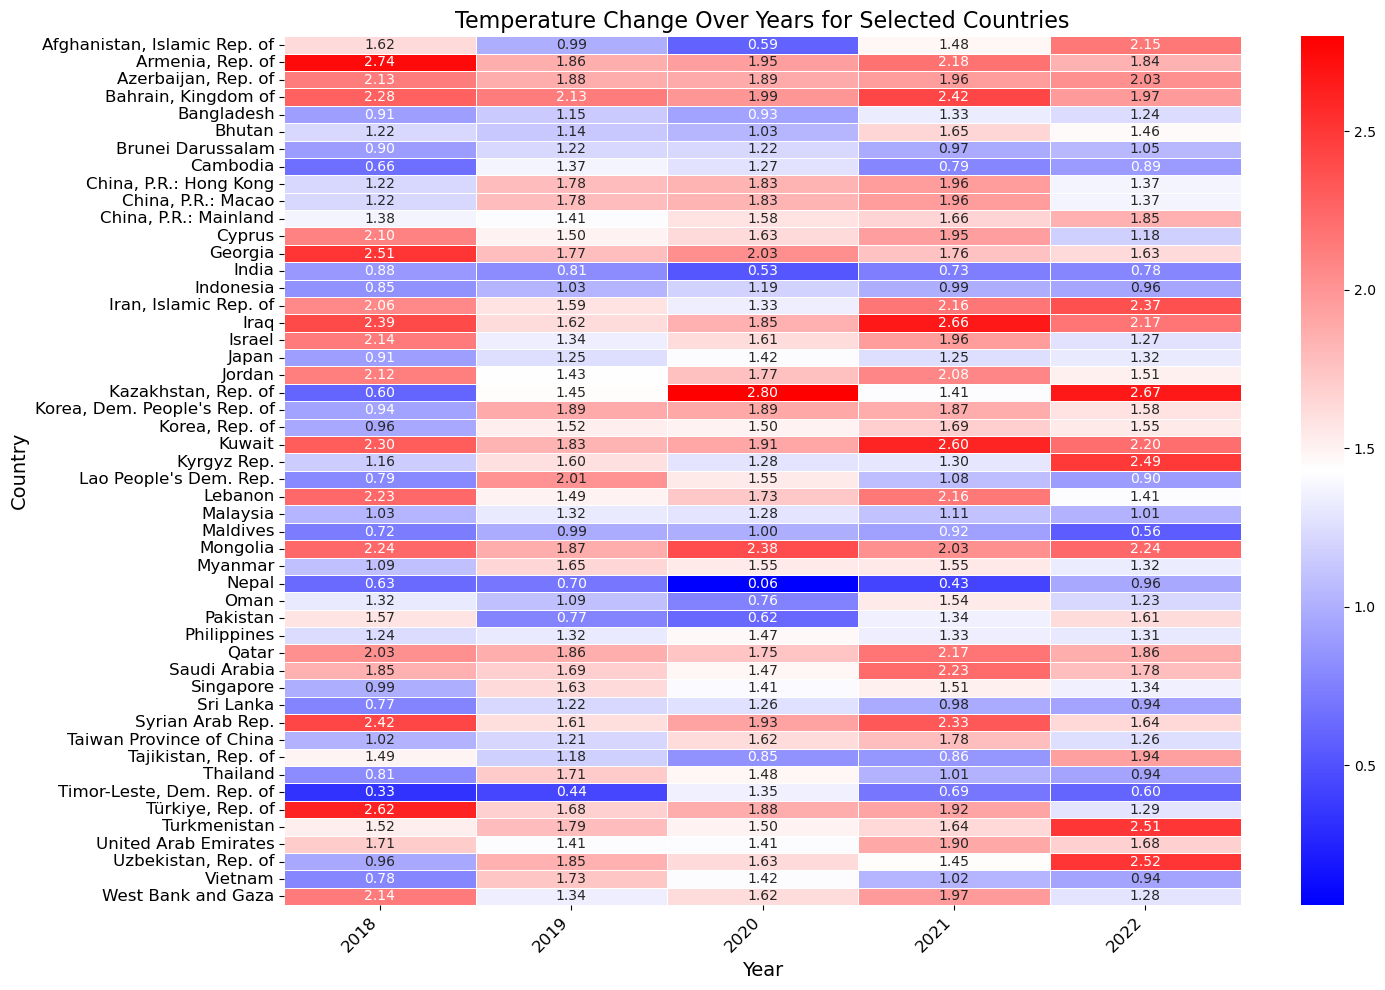

In [ ]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_heatmap(ast, title)

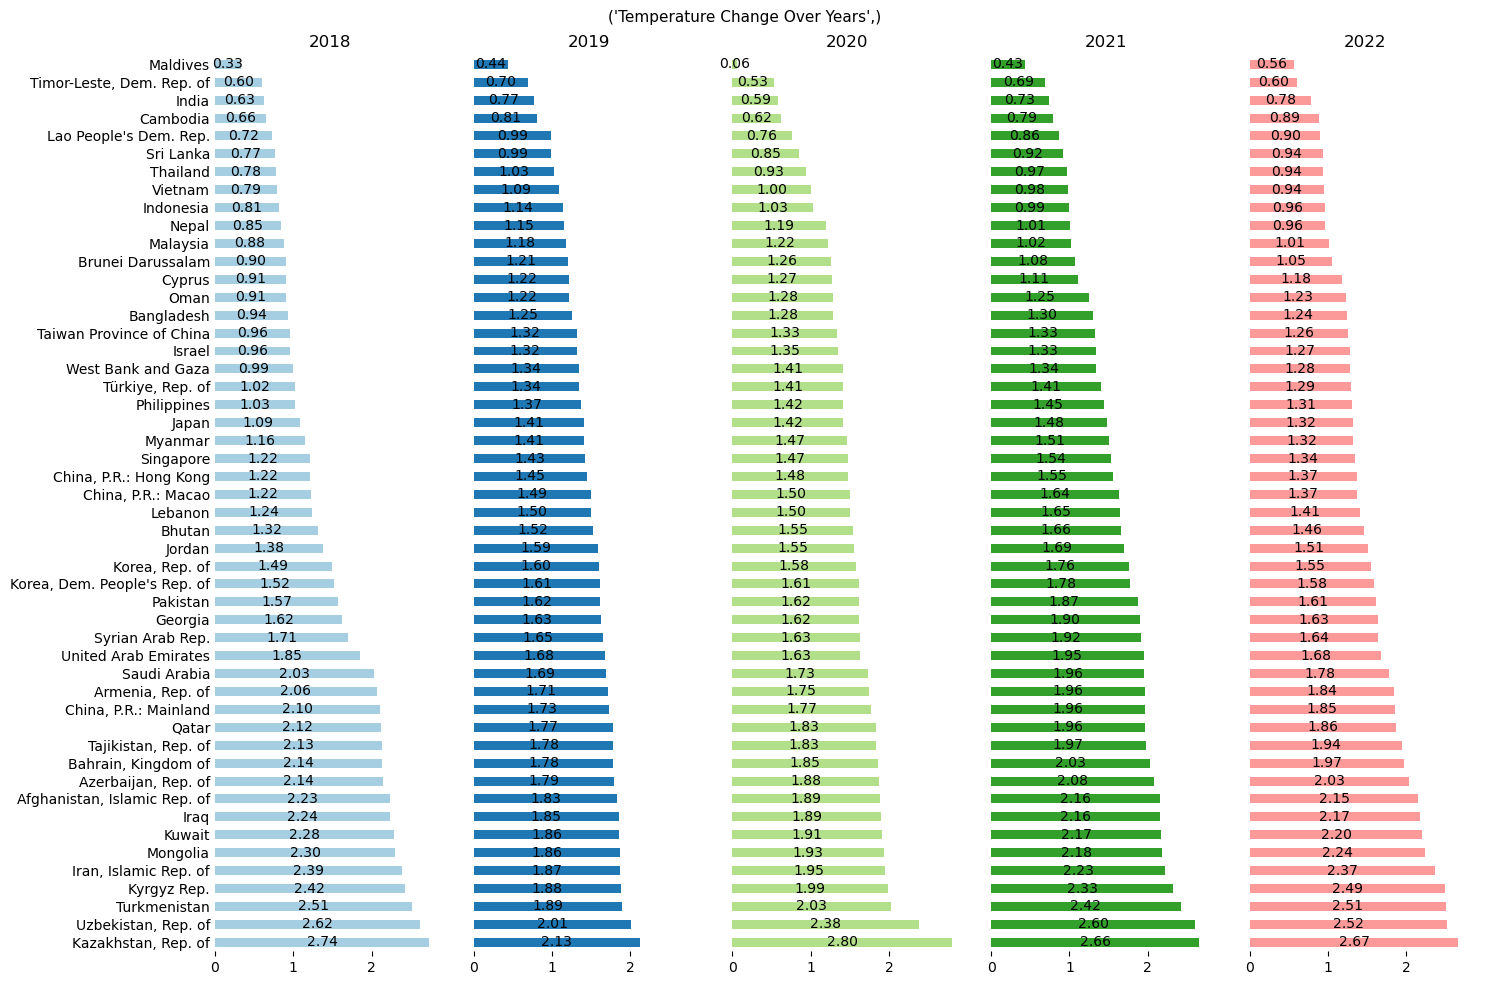

In [ ]:
title="Temperature Change Over Years",
visualize_change_panel_bar_plot(ast, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [ ]:
top_k_countries_by_year(ast, k=3)

Top 3 countries for 2018:
Country: Armenia, Rep. of, Value: 2.739
Country: Türkiye, Rep. of, Value: 2.617
Country: Georgia, Value: 2.514
----------------------------------------
Top 3 countries for 2019:
Country: Bahrain, Kingdom of, Value: 2.127
Country: Lao People's Dem. Rep., Value: 2.014
Country: Korea, Dem. People's Rep. of, Value: 1.889
----------------------------------------
Top 3 countries for 2020:
Country: Kazakhstan, Rep. of, Value: 2.800
Country: Mongolia, Value: 2.384
Country: Georgia, Value: 2.031
----------------------------------------
Top 3 countries for 2021:
Country: Iraq, Value: 2.661
Country: Kuwait, Value: 2.605
Country: Bahrain, Kingdom of, Value: 2.421
----------------------------------------
Top 3 countries for 2022:
Country: Kazakhstan, Rep. of, Value: 2.665
Country: Uzbekistan, Rep. of, Value: 2.520
Country: Turkmenistan, Value: 2.508
----------------------------------------


In [ ]:
bottom_k_countries_by_year(ast, k=3)

Bottom 3 countries for 2018:
Country: Timor-Leste, Dem. Rep. of, Value: 0.333
Country: Kazakhstan, Rep. of, Value: 0.605
Country: Nepal, Value: 0.630
----------------------------------------
Bottom 3 countries for 2019:
Country: Timor-Leste, Dem. Rep. of, Value: 0.443
Country: Nepal, Value: 0.699
Country: Pakistan, Value: 0.774
----------------------------------------
Bottom 3 countries for 2020:
Country: Nepal, Value: 0.059
Country: India, Value: 0.529
Country: Afghanistan, Islamic Rep. of, Value: 0.587
----------------------------------------
Bottom 3 countries for 2021:
Country: Nepal, Value: 0.428
Country: Timor-Leste, Dem. Rep. of, Value: 0.693
Country: India, Value: 0.734
----------------------------------------
Bottom 3 countries for 2022:
Country: Maldives, Value: 0.559
Country: Timor-Leste, Dem. Rep. of, Value: 0.601
Country: India, Value: 0.784
----------------------------------------


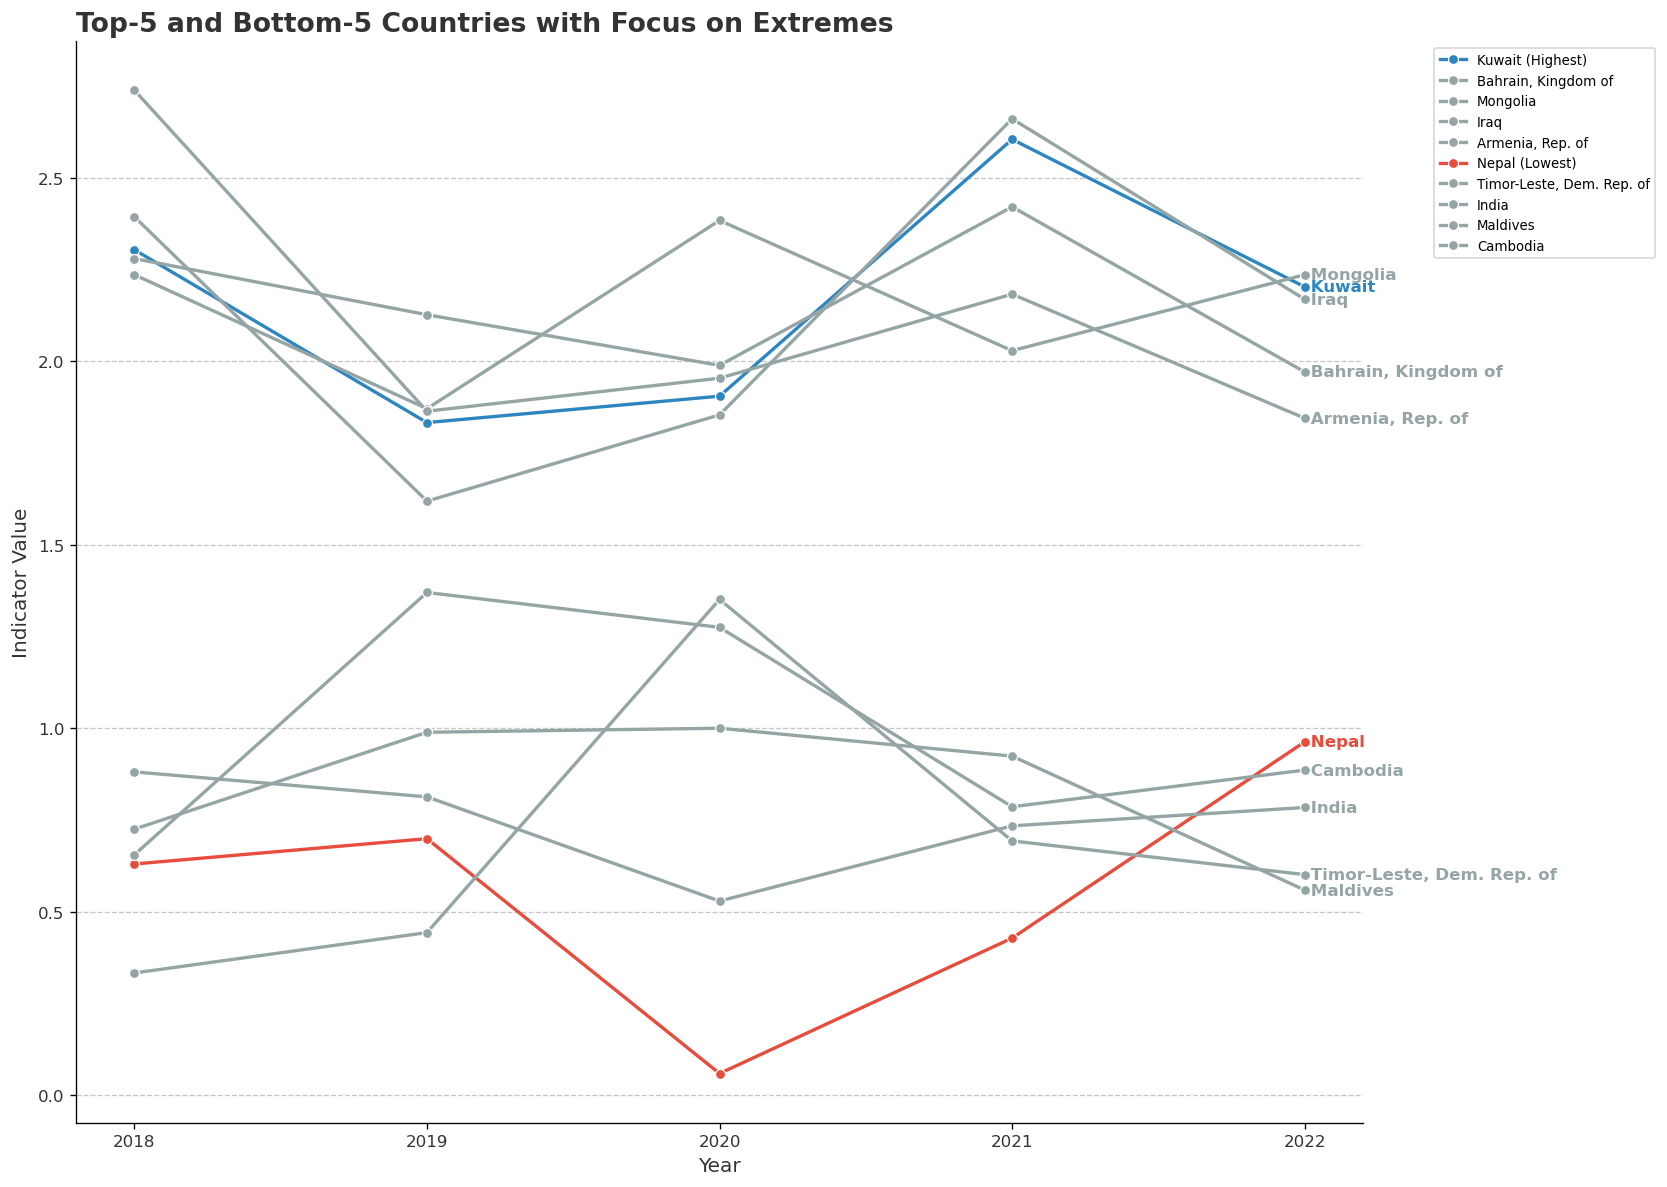

In [ ]:
visualize_top_bottom_k_line_plot(ast, 5)

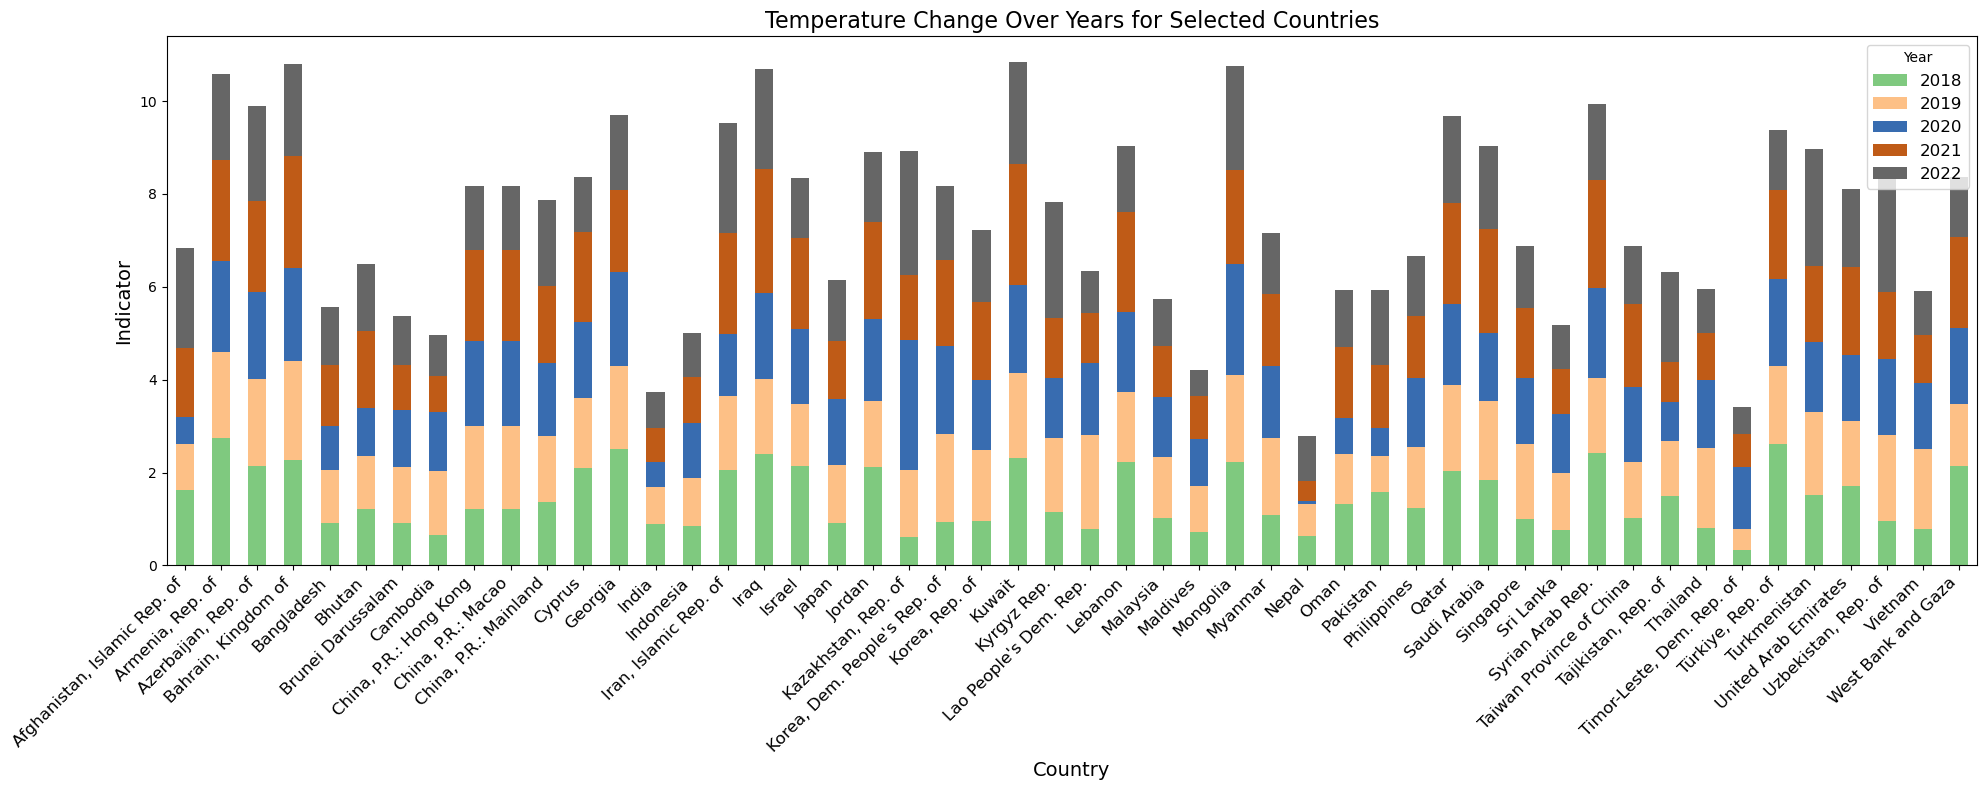

In [ ]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_stacked_bar_plot(ast, title)